<a href="https://colab.research.google.com/github/Tushar-Keshari/Deep-Learning/blob/main/DL_02_ASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# NAME : Aziz Travadi
# ROLL NO : U21EC065

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError


In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], s=1, alpha=0.5)
plt.title("PCA - 2D Projection of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [5]:
input_dim = x_train.shape[1]
encoding_dim = 2

input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train, epochs=20, batch_size=256,
                validation_data=(x_test, x_test), verbose=2)

Epoch 1/20
235/235 - 6s - 25ms/step - loss: 0.0744 - val_loss: 0.0562
Epoch 2/20
235/235 - 4s - 19ms/step - loss: 0.0536 - val_loss: 0.0511
Epoch 3/20
235/235 - 3s - 12ms/step - loss: 0.0493 - val_loss: 0.0473
Epoch 4/20
235/235 - 3s - 13ms/step - loss: 0.0467 - val_loss: 0.0455
Epoch 5/20
235/235 - 6s - 24ms/step - loss: 0.0451 - val_loss: 0.0444
Epoch 6/20
235/235 - 4s - 15ms/step - loss: 0.0440 - val_loss: 0.0434
Epoch 7/20
235/235 - 3s - 12ms/step - loss: 0.0430 - val_loss: 0.0426
Epoch 8/20
235/235 - 5s - 22ms/step - loss: 0.0423 - val_loss: 0.0421
Epoch 9/20
235/235 - 5s - 23ms/step - loss: 0.0417 - val_loss: 0.0415
Epoch 10/20
235/235 - 5s - 21ms/step - loss: 0.0413 - val_loss: 0.0413
Epoch 11/20
235/235 - 3s - 12ms/step - loss: 0.0409 - val_loss: 0.0408
Epoch 12/20
235/235 - 4s - 18ms/step - loss: 0.0405 - val_loss: 0.0406
Epoch 13/20
235/235 - 4s - 15ms/step - loss: 0.0402 - val_loss: 0.0403
Epoch 14/20
235/235 - 5s - 22ms/step - loss: 0.0399 - val_loss: 0.0401
Epoch 15/20
235

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


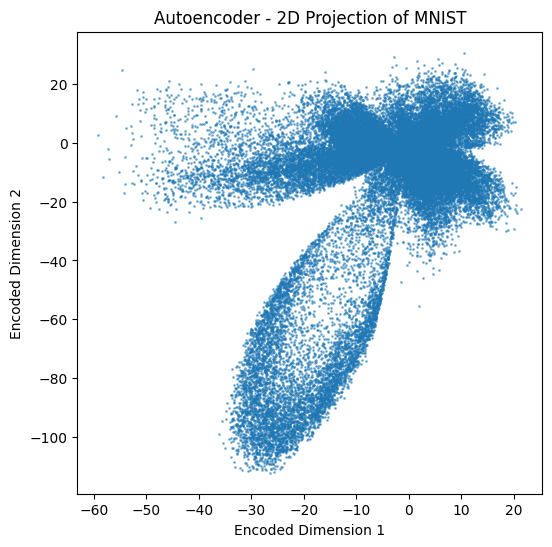


Comparison of PCA and Autoencoder:
PCA Explained Variance Ratio: 0.16800496
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Autoencoder Mean Squared Error on Test Set: 0.0391


In [6]:
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], s=1, alpha=0.5)
plt.title("Autoencoder - 2D Projection of MNIST")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

print("\nComparison of PCA and Autoencoder:")
print("PCA Explained Variance Ratio:", np.sum(pca.explained_variance_ratio_))
mse = MeanSquaredError()
mse_autoencoder = mse(x_test, autoencoder.predict(x_test)).numpy().mean()
print(f"Autoencoder Mean Squared Error on Test Set: {mse_autoencoder:.4f}")